In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# File path to your encoded dataset
input_file_path = r"C:\Users\Joseph\OneDrive\文件\Joseph\MIS545\545FinalDataset_FrequencyEncoded.csv"

try:
    df = pd.read_csv(input_file_path)
    print("Encoded dataset loaded successfully.")
except Exception as e:
    print(f"Error reading encoded CSV file: {e}")
    df = None

if df is not None:
    # Ensure the target variable is present
    target_variable = 'IncidentGrade'
    if target_variable not in df.columns:
        print(f"Error: Target variable '{target_variable}' not found in the dataset.")
    else:
        # Encode the target variable
        df[target_variable] = df[target_variable].apply(lambda x: 1 if x == 'FalsePositive' else 0)

        # Define features (X) and target (y)
        X = df.drop(columns=[target_variable])  # Features
        y = df[target_variable]  # Target variable

Encoded dataset loaded successfully.


In [21]:
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (25000, 53)
Shape of y (target): (25000,)


Performing hyperparameter tuning...
Fitting 3 folds for each of 28 candidates, totalling 84 fits
Best hyperparameters:
{'max_depth': 20, 'n_estimators': 50}
Evaluating the best model...
Train Accuracy: 0.9384
Test Accuracy: 0.8691

Confusion Matrix:
[[3207  538]
 [ 444 3311]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3745
           1       0.86      0.88      0.87      3755

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500



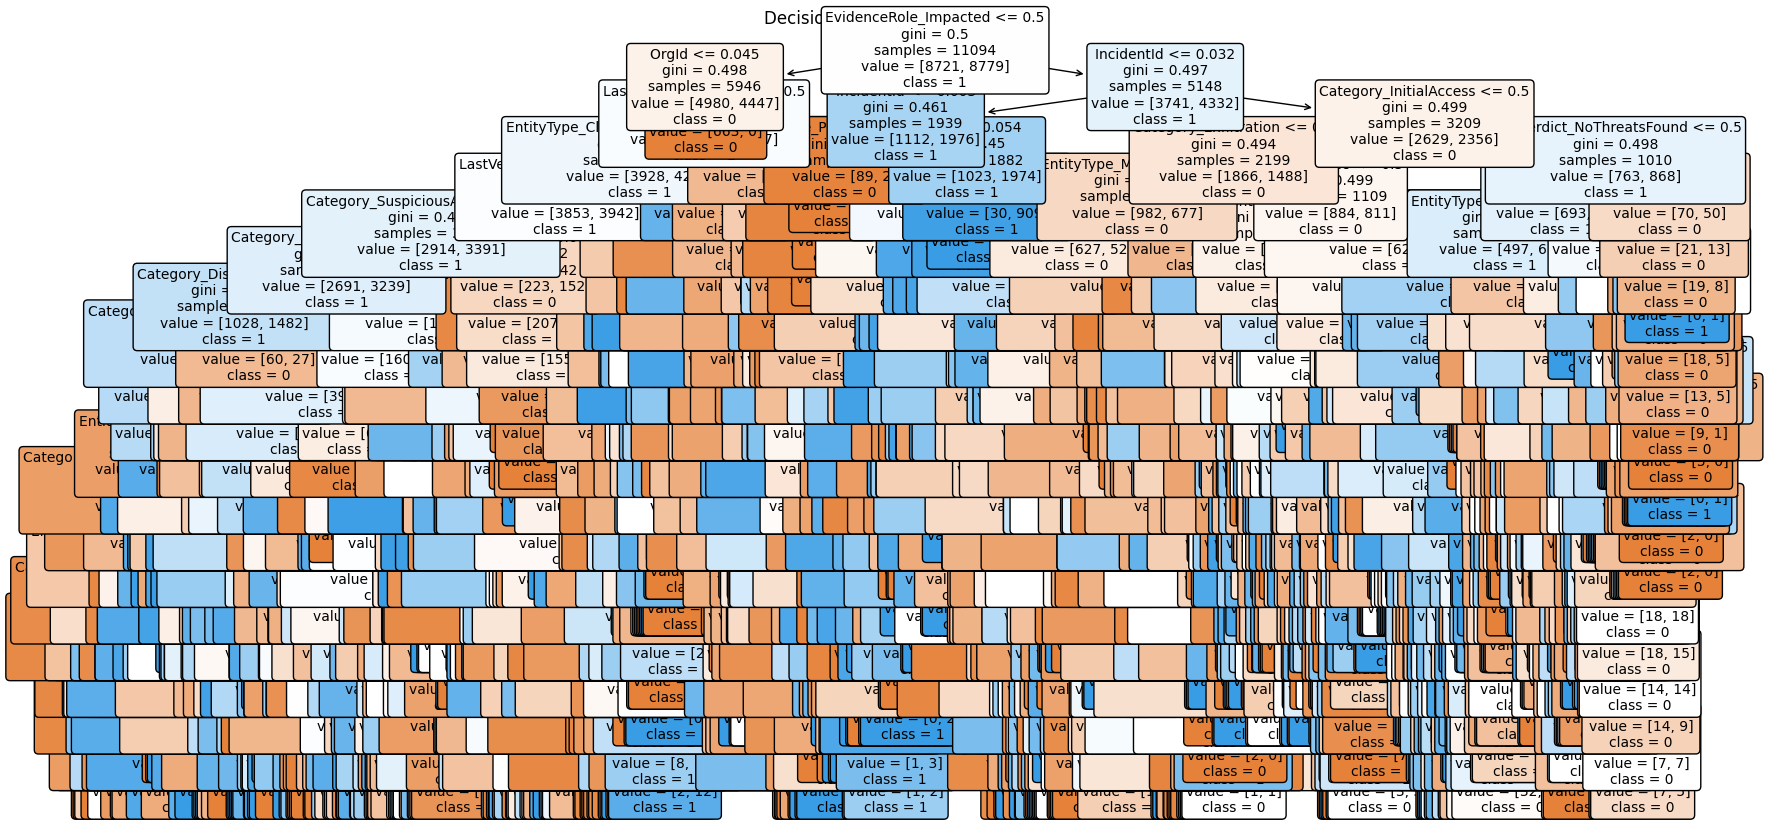

In [29]:
#RANDOM FOREST

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
'n_estimators': [10, 50, 100,1000],
'max_depth': [3, 5, 7, 10, 20, 25, 30],
}

# Perform GridSearchCV
print("Performing hyperparameter tuning...")
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best hyperparameters:")
print(best_params)

# Evaluate the tuned model
print("Evaluating the best model...")
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Compute accuracy and other metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

# Output the evaluation results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming the best_model is already trained
# Extract one tree from the Random Forest
single_tree = best_model.estimators_[0]  # Get the first tree from the forest

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, 
          feature_names=X.columns,  # Replace with your actual feature names
          class_names=best_model.classes_.astype(str),  # Replace with class names if needed
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Decision Tree Classifier and hyperparameter search space
param_grid = {
    'max_depth': [3, 5, 7, 10, 15],  # Control tree depth, None means no limit
    'criterion': ['gini', 'entropy'],  # Gini or entropy for split quality
    #'min_samples_split': [2, 5, 10],  # Min samples to split a node
    #'min_samples_leaf': [1, 2, 5],    # Min samples to be at a leaf nod
}

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV
print("Performing hyperparameter tuning...")
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Output the best hyperparameters
print("Best hyperparameters found:")
print(best_params)

# Make predictions with the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

# Output the evaluation results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)


Performing hyperparameter tuning...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters found:
{'criterion': 'gini', 'max_depth': 15}
Train Accuracy: 0.8401
Test Accuracy: 0.8163

Confusion Matrix:
[[3282  463]
 [ 915 2840]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      3745
           1       0.86      0.76      0.80      3755

    accuracy                           0.82      7500
   macro avg       0.82      0.82      0.82      7500
weighted avg       0.82      0.82      0.82      7500



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# 2. Logistic Regression with GridSearchCV
# ----------------------------------------------------------------------------
print("\nPerforming hyperparameter tuning for Logistic Regression...")

# Define the hyperparameter search grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],  # Type of penalty (regularization) - 'l2' is the default for most solvers
    'max_iter': [10, 50, 100, 500]  # Maximum number of iterations
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1
)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Output the best hyperparameters
print("Best hyperparameters found:")
print(best_params)

# Evaluate the best model on the test data
y_pred_logreg = best_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
confusion = confusion_matrix(y_test, y_pred_logreg)
report = classification_report(y_test, y_pred_logreg)

# Output evaluation results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Logistic Regression Test Accuracy: {accuracy_logreg:.4f}")
print("\nConfusion Matrix for Logistic Regression:")
print(confusion)
print("\nClassification Report for Logistic Regression:")
print(report)



Performing hyperparameter tuning for Logistic Regression...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best hyperparameters found:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
Train Accuracy: 0.8401
Test Accuracy: 0.8163
Logistic Regression Test Accuracy: 0.6063

Confusion Matrix for Logistic Regression:
[[2152 1593]
 [1360 2395]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      3745
           1       0.60      0.64      0.62      3755

    accuracy                           0.61      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.61      0.61      0.61      7500



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

# Simulate data loading if dataset isn't provided
# Replace this with your actual loaded data
import pandas as pd
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to create KMeans pipeline
def create_kmeans_pipeline(n_clusters, max_iter_value):
    """
    Create pipeline with given number of clusters and max_iter for KMeans.
    Args:
        n_clusters (int): Number of clusters to form.
        max_iter_value (int): Number of maximum iterations.
    Returns:
        Pipeline: KMeans pipeline ready for clustering.
    """
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normalize features
        ('pca', PCA(n_components=10)),  # Dimensionality reduction
        ('kmeans', KMeans(n_clusters=n_clusters, max_iter=max_iter_value, random_state=42))  # KMeans clustering
    ])
    return pipeline


# Define hyperparameter grid for KMeans
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5],  # Number of clusters to test
    'kmeans__max_iter': [100, 200, 300]  # Number of iterations
}

# Create pipeline template
base_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('kmeans', KMeans(random_state=42))
])

# Set up GridSearch with cross-validation
print("\nRunning GridSearchCV to find the best KMeans parameters...")
grid_search = GridSearchCV(
    base_pipeline, 
    param_grid, 
    cv=5, 
    scoring='accuracy',  # This can be changed to other metrics depending on goals
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearch to the training data
grid_search.fit(X_train)

# Output the results of GridSearch
print("\nBest parameters found:")
print(grid_search.best_params_)

# Use the best pipeline found by GridSearch
best_pipeline = grid_search.best_estimator_

# Predict on test data
X_test_pca = best_pipeline.named_steps['pca'].transform(best_pipeline.named_steps['scaler'].transform(X_test))
test_clusters = best_pipeline.named_steps['kmeans'].predict(X_test_pca)

# Map predictions using LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)  # Fit encoder to the target values in the training set
test_mapped_labels = label_encoder.transform(test_clusters)

# Evaluate training and testing performance
train_accuracy = accuracy_score(y_train, train_mapped_labels)
test_accuracy = accuracy_score(y_test, test_mapped_labels)

train_report = classification_report(y_train, train_mapped_labels)
test_report = classification_report(y_test, test_mapped_labels)

# Store results
results.append({
    "max_iter": iter_value,
    "train_accuracy": train_accuracy,
    "test_accuracy": test_accuracy,
    "train_report": train_report,
    "test_report": test_report
})

# Output evaluation results
for result in results:
    print(f"\nNumber of iterations: {result['max_iter']}")
    print(f"Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print("\nTrain Classification Report:")
    print(result['train_report'])
    print("\nTest Classification Report:")
    print(result['test_report'])



Running GridSearchCV to find the best KMeans parameters...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Joseph\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(



Best parameters found:
{'kmeans__max_iter': 100, 'kmeans__n_clusters': 2}

Number of iterations: 100
Train Accuracy: 0.4652
Test Accuracy: 0.4650

Train Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.44      0.45     10016
           1       0.47      0.49      0.48      9984

    accuracy                           0.47     20000
   macro avg       0.47      0.47      0.46     20000
weighted avg       0.47      0.47      0.46     20000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.43      0.44      2484
           1       0.47      0.50      0.49      2516

    accuracy                           0.47      5000
   macro avg       0.46      0.46      0.46      5000
weighted avg       0.46      0.47      0.46      5000


Number of iterations: 1000
Train Accuracy: 0.4654
Test Accuracy: 0.4650

Train Classification Report:
              precision    recall  f1

c:\Users\Joseph\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
%pip install xgboost

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\joseph\appdata\local\programs\python\python311\lib\site-packages\blinker-1.6.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\joseph\appdata\local\programs\python\python311\lib\site-packages\brotli-1.1.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\joseph\appdata\local\programs\python\python311\lib\site-packages\bs4-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\j

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv(r'C:\Users\Joseph\OneDrive\文件\Joseph\MIS545\545FinalDataset_FrequencyEncoded.csv')

# Define features (X) and target (y)
X = data.drop(columns=['IncidentGrade'])
y = data['IncidentGrade']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features for SVM (required for effective performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define individual classifiers
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
svm_model = SVC(probability=True, random_state=42)  # `probability=True` for soft voting

# Combine classifiers into a soft voting ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('random_forest', rf_model),
        ('xgboost', xgb_model),
        ('svm', svm_model),
    ],
    voting='soft'  # Soft voting uses predicted probabilities
)

# Define hyperparameter grid for tuning the ensemble model
param_grid = {
    'random_forest__n_estimators': [100, 200],
    'random_forest__max_depth': [10, 20],
    'xgboost__learning_rate': [0.01, 0.1],
    'xgboost__n_estimators': [100, 200],
    'svm__C': [ 1],
    'svm__kernel': ['rbf']
}

# Use GridSearchCV to tune hyperparameters for the ensemble
grid_search = GridSearchCV(
    estimator=ensemble_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

print("Performing hyperparameter tuning...")
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the best ensemble model
print("Training the best ensemble model...")
best_model.fit(X_train, y_train)

# Make predictions with the tuned ensemble model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
print("Evaluating the best ensemble model...")
metrics = {
    "Train Accuracy": accuracy_score(y_train, y_train_pred),
    "Test Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred, average='weighted'),
    "Recall": recall_score(y_test, y_test_pred, average='weighted'),
    "F1-Score": f1_score(y_test, y_test_pred, average='weighted')
}

# Print evaluation metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Display classification report for detailed insights
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Performing hyperparameter tuning...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\Joseph\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:02:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 200, 'svm__C': 1, 'svm__kernel': 'rbf', 'xgboost__learning_rate': 0.1, 'xgboost__n_estimators': 200}
Training the best ensemble model...


c:\Users\Joseph\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:04:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluating the best ensemble model...
Train Accuracy: 0.8867
Test Accuracy: 0.8490
Precision: 0.8564
Recall: 0.8490
F1-Score: 0.8478

Classification Report:
                precision    recall  f1-score   support

BenignPositive       0.80      0.79      0.79      1341
 FalsePositive       0.83      0.93      0.88      2500
  TruePositive       0.97      0.74      0.84      1159

      accuracy                           0.85      5000
     macro avg       0.87      0.82      0.84      5000
  weighted avg       0.86      0.85      0.85      5000



In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a smaller and focused hyperparameter search grid
params = {
    'C': [0.01, 0.1, 1],          # Keep it small
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 1]  # Focus on one kernel for simplicity
}

# Initialize the SVM model
svc = SVC()

# Perform GridSearchCV with reduced cross-validation folds
print("\nRunning GridSearchCV for SVM with reduced computation...")
grid_search = GridSearchCV(svc, params, cv=2, n_jobs=-1, verbose=0)  # 2 folds, parallel processing

# Fit the model using the training set
grid_search.fit(X_train, y_train)

# Output the best hyperparameters
print("\nBest hyperparameters found:")
print(grid_search.best_params_)

# Predict on the test set with the best model
y_pred_svm = grid_search.best_estimator_.predict(X_test)

# Evaluate performance
train_accuracy = accuracy_score(y_train, grid_search.best_estimator_.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred_svm)

# Output the evaluation results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


Running GridSearchCV for SVM with reduced computation...

Best hyperparameters found:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Train Accuracy: 0.7559
Test Accuracy: 0.7363

Confusion Matrix for SVM:
[[2730 1015]
 [ 963 2792]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      3745
           1       0.73      0.74      0.74      3755

    accuracy                           0.74      7500
   macro avg       0.74      0.74      0.74      7500
weighted avg       0.74      0.74      0.74      7500

